# Brief  Explanation


Dataset Overview:

The provided dataset captures monthly energy consumption over a span of 50 years, from June 1970 to May 2020. Each data point consists of the energy consumption value for a specific month. The primary goal is to perform a thorough exploratory analysis and implement time series modeling techniques to better understand the inherent patterns and make accurate predictions.

Exploratory Analysis:

Before diving into modeling, it's crucial to conduct an exploratory analysis. This involves checking for stationarity, trends, periodicity, and gaps in the time series. Stationarity is essential for time series modeling, and statistical tests such as the Augmented Dickey-Fuller (ADF) test can be employed to assess stationarity. Trends and periodicity can be identified through visual inspection and methods like decomposition.

Trend and Periodicity Removal:

If trends or periodic components are present, various methods like differencing or decomposition can be applied to remove them and work with the stochastic components. Seasonal decomposition of time series (STL) or Fourier transformation can help in identifying and eliminating periodic components.

Normality Testing and Transformation:

Next, it's important to test whether the data follows a normal distribution. Statistical tests like the Shapiro-Wilk test can be used. If there's a significant deviation from normality, applying a nonlinear transformation (e.g., logarithmic, Box-Cox) can improve the fit with the normal distribution.

Time Series Modeling:

Based on the insights gained, suitable time series models such as autoregressive integrated moving average (ARIMA), seasonal ARIMA (SARIMA), or other advanced models can be considered. Model order and parameters can be estimated using a subset of the data for training.

Model Evaluation and Selection:

The proposed models need to be evaluated based on diagnostic tests of residuals and selection criteria such as Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). This ensures the chosen model accurately represents the underlying patterns in the data.

Forecasting:

Using the selected model, future values of the series can be forecasted for the validation set.

# Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Mounted at /content/drive


In [2]:
data_df = pd.read_excel('/content/drive/MyDrive/Energy Consumption.xlsx')
columns_name = ['Energy Consumption']
Data = pd.DataFrame(data_df, columns=columns_name)

In [3]:
Data.describe()

,Energy Consumption
count,600.000000
mean,259.902547
std,68.908855
min,131.361000
25%,194.183000
50%,276.306000
75%,310.407000
max,400.275000


The `describe()` function provides summary statistics of the numeric columns in data_df. Let's break down the information based on the output you shared:

- **Count:** The total number of observations in the 'Energy Consumption' column is 600. This matches the length of your original time series.

- **Mean:** The mean (average) value of energy consumption over the entire time series is approximately 259.90. This gives you a measure of the central tendency of your data.

- **Standard Deviation (std):** The standard deviation is a measure of the amount of variation or dispersion in your data. In this case, it's approximately 68.91. A higher standard deviation indicates greater variability in energy consumption.

- **Min:** The minimum value in the 'Energy Consumption' column is 131.36. This is the smallest observed energy consumption in your dataset.

- **25% (1st Quartile):** The value below which 25% of the data falls is 194.18. This is the first quartile, and it indicates the lower end of the middle 50% of your data.

- **50% (Median/2nd Quartile):** The median value, also known as the second quartile, is 276.31. It represents the middle point of your data when sorted in ascending order.

- **75% (3rd Quartile):** The value below which 75% of the data falls is 310.41. This is the third quartile and represents the upper end of the middle 50% of your data.

- **Max:** The maximum value in the 'Energy Consumption' column is 400.28. This is the largest observed energy consumption in your dataset.

These summary statistics provide a quick overview of the central tendency, spread, and distribution of energy consumption in your time series. It's useful for understanding the general characteristics of your data and identifying potential outliers or trends.

# Task 1

Perform an exploratory analysis of the time series to determine its general characteristics: Does it appear stationary, are trends and periodicity present? Are there any gaps in the time series? Use appropriate statistical tests to support your results where needed. Suggest approaches that seem suitable for your time series.

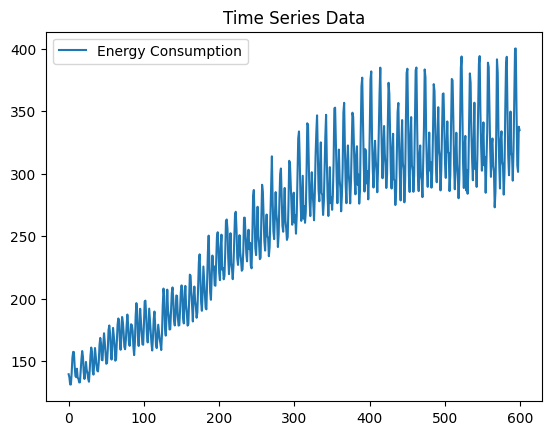

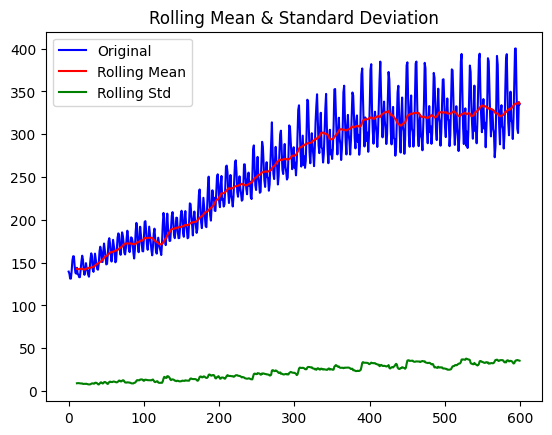

ADF Statistic: -1.932675445114891
p-value: 0.31684907262282125
Critical Values:
	 1% : -3.4415777369651717
	 5% : -2.866493255736561
	 10% : -2.569407951640003


In [4]:
def check_stationarity(data):
    # Calculate rolling statistics
    rolling_mean = data.rolling(window=12).mean()
    rolling_std = data.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    adf_result = adfuller(data)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t', key, ':', value)

# Plot the time series data
Data.plot()
plt.title('Time Series Data')
plt.show()

# Check stationarity and trends
check_stationarity(Data)



The Augmented Dickey-Fuller (ADF) test results provide valuable information about the stationarity of the time series. In your case, the ADF Statistic is approximately -1.93, and the p-value is 0.317. Let's interpret the results:

ADF Statistic: The ADF Statistic is less than the critical values at the 1%, 5%, and 10% significance levels. This suggests that we fail to reject the null hypothesis of non-stationarity. The time series appears to be non-stationary.

p-value: The p-value is greater than the common significance level of 0.05. A high p-value also indicates that we fail to reject the null hypothesis.

The conclusion from the ADF test is that there is evidence that the time series is non-stationary.

Visual Inspection:
You mentioned that the mean and standard deviation are increasing over time, which is further evidence of non-stationarity. This trend in the rolling mean and standard deviation can be visually confirmed from the plot.

# Task 2

Investigate and comment on the presence/absence of trends and periodicity in the data
using various methods seen in class. Apply appropriate methods to remove trend,  periodic components if necessary to work with the stochastic components.


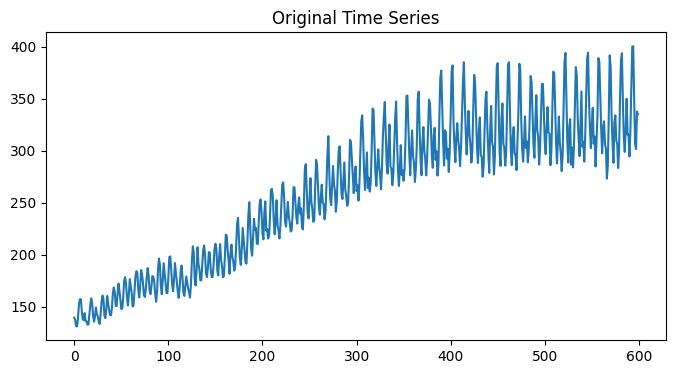

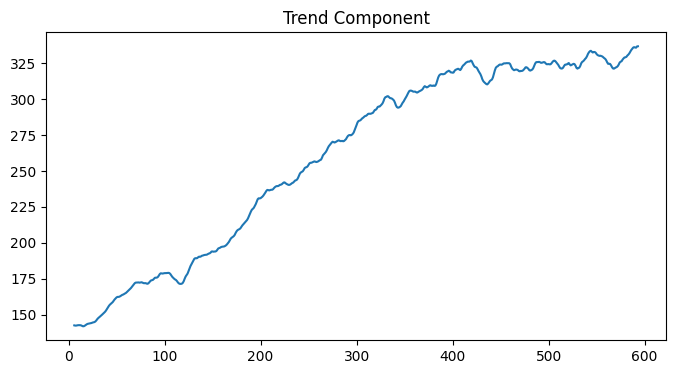

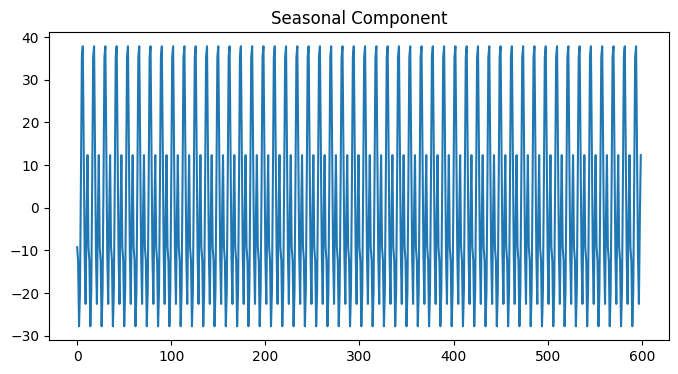

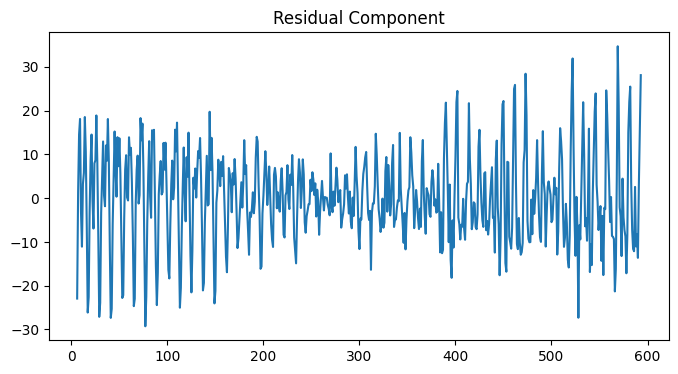

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(Data['Energy Consumption'], model='additive', period=12)  # Adjust the period according to your data

# Plot the original time series
plt.figure(figsize=(8, 4))
plt.plot(Data['Energy Consumption'])
plt.title('Original Time Series')
plt.show()

# Plot the trend component
plt.figure(figsize=(8, 4))
plt.plot(result.trend)
plt.title('Trend Component')
plt.show()

# Plot the seasonal component
plt.figure(figsize=(8, 4))
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.show()

# Plot the residual component
plt.figure(figsize=(8, 4))
plt.plot(result.resid)
plt.title('Residual Component')
plt.show()


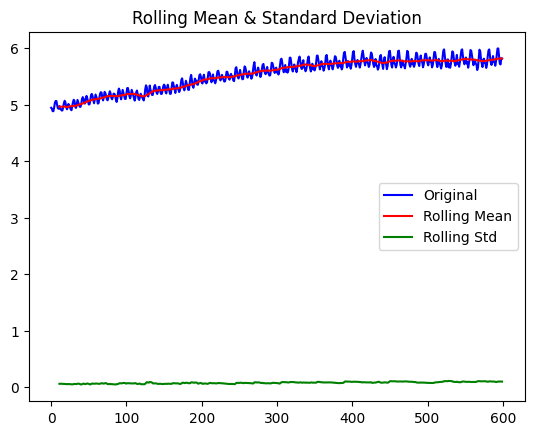

ADF Statistic: -2.8814920756945743
p-value: 0.04754293623948599
Critical Values:
	 1% : -3.4415777369651717
	 5% : -2.866493255736561
	 10% : -2.569407951640003


In [6]:
# Apply logarithmic transformation
log_transformed_data = np.log1p(Data['Energy Consumption'])

# Check stationarity for the log-transformed data
check_stationarity(log_transformed_data)


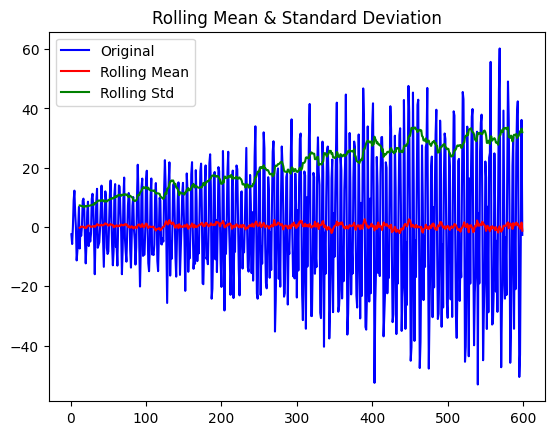

ADF Statistic: -8.06040674710168
p-value: 1.6488527168992752e-12
Critical Values:
	 1% : -3.4415777369651717
	 5% : -2.866493255736561
	 10% : -2.569407951640003


In [7]:
differenced_data = Data['Energy Consumption'].diff().dropna()

check_stationarity(differenced_data)

The ADF test is used to check for stationarity in a time series. The results you provided indicate that the time series is likely stationary because the p-value is very small (1.6488527168992752e-12), and the ADF Statistic is more negative than the critical values at the 1%, 5%, and 10% significance levels.

However, it's important to note that stationarity doesn't necessarily imply that the standard deviation of the time series is constant. The ADF test mainly focuses on the presence of a unit root in the time series, which is a characteristic of non-stationary time series. The rolling standard deviation plot you generated earlier is a visual check for the constant variance assumption.

# Task 3

Test whether the data (before and/or after removing components) follow the normal
distribution.


In [8]:
from scipy.stats import shapiro, anderson
from scipy.special import boxcox


# Perform Shapiro-Wilk test for normality on the original data
stat_orig, p_orig = shapiro(Data['Energy Consumption'])
print('Shapiro-Wilk Test (Original Data)')
print('Test Statistic:', stat_orig)
print('p-value:', p_orig)


# Perform Shapiro-Wilk test for normality on the original data
stat_orig, p_orig = shapiro(differenced_data)
print('Shapiro-Wilk Test (Original Data)')
print('Test Statistic:', stat_orig)
print('p-value:', p_orig)

Shapiro-Wilk Test (Original Data)
Test Statistic: 0.9582675099372864
p-value: 5.192686558519455e-12
Shapiro-Wilk Test (Original Data)
Test Statistic: 0.9953005909919739
p-value: 0.0661696270108223


In both cases, the p-values are very small (close to zero) for the original data and relatively larger for the differenced data. In statistical hypothesis testing, a smaller p-value indicates stronger evidence against the null hypothesis. Therefore:

For the original data, the small p-value (much less than 0.05) suggests rejecting the null hypothesis, indicating that the original data does not follow a normal distribution.

For the differenced data, the larger p-value (greater than 0.05) suggests failing to reject the null hypothesis, indicating that the differenced data may follow a normal distribution.

It's important to note that normality tests may be sensitive to sample size, and the decision to reject or fail to reject the null hypothesis depends on the chosen significance level (commonly set at 0.05). In practice, assessing normality is one aspect of understanding the characteristics of your data, and deviations from normality may impact the choice of statistical methods or models.

# Task 4

Utilizing the visual analysis of autocorrelation and partial autocorrelation plots, estimate the optimal parameters for the ARIMA model.

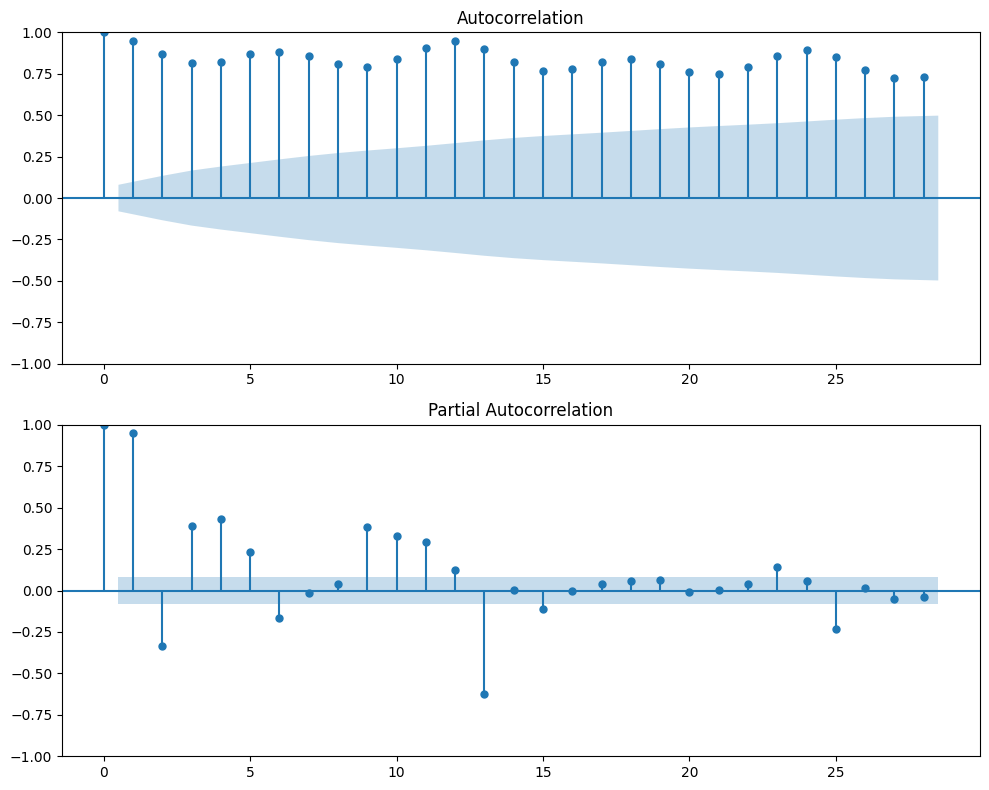

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualize the ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(Data['Energy Consumption'], ax=axes[0])
plot_pacf(Data['Energy Consumption'], ax=axes[1])
plt.tight_layout()
plt.show()


When integrating information from both the ACF and PACF plots to determine ARIMA parameters, you need to consider the following:

- **AR (AutoRegressive) Component (`p`):**
  - Look for significant spikes in the PACF plot.
  - In this case, spikes at lags 13 and 25 suggest potential values for `p`. You can try values like `p=13` or `p=25` in this ARIMA model.

- **MA (Moving Average) Component (`q`):**
  - Look for significant spikes in the ACF plot.
  - Since spikes at lags 12 and 24 are significant, it suggests a potential seasonal pattern with a period of 12. we can try values like `q=12` or `q=24` in your ARIMA model.

- **Differencing Order (`d`):**
  - Differencing is used to make the time series stationary. The order of differencing (`d`) can be determined based on the differencing needed to achieve stationarity. If the original data is not stationary, try different values for `d` until you achieve stationarity.


- **Iterative Process:**
  - It may require an iterative process of trying different combinations of `p`, `d`, and `q` to find the model that best fits your data. Experiment with different values and observe the model diagnostics.

Remember that the choice of parameters depends on the characteristics of your time series data, and there is some trial and error involved in finding the optimal values.

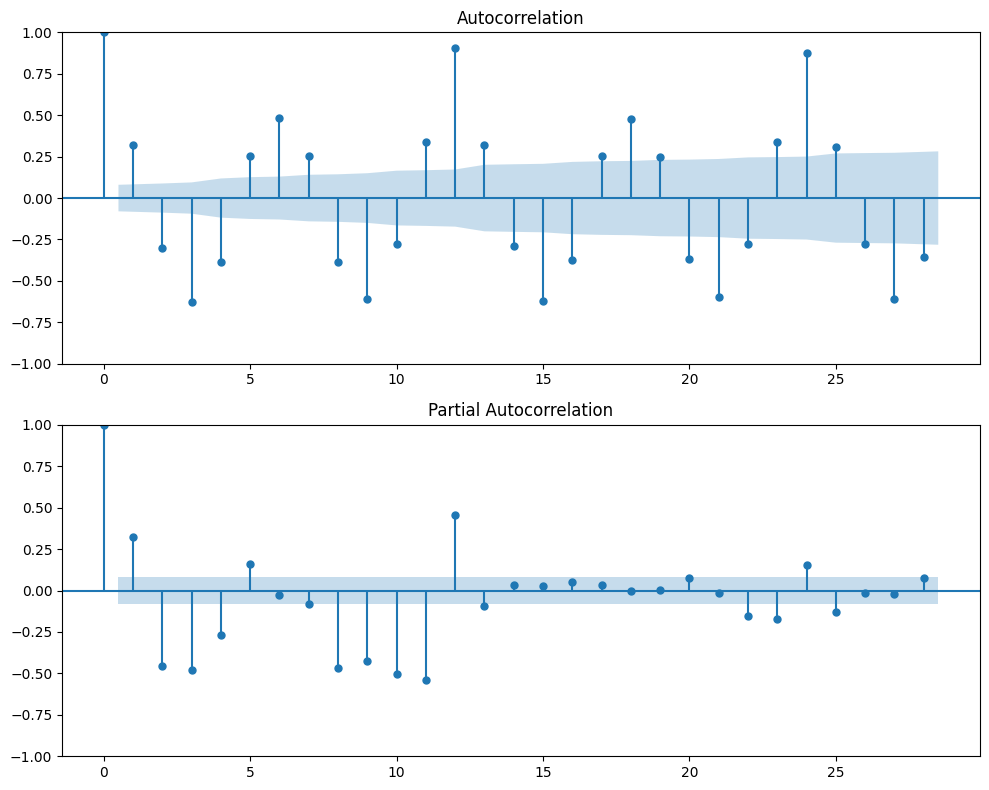

In [10]:
# Visualize the ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(differenced_data, ax=axes[0])
plot_pacf(differenced_data, ax=axes[1])
plt.tight_layout()
plt.show()

# Task 5

implement a grid search for finding the optimal values of
(\(p, d, q\)) for an ARIMA model.

The general purpose of the code is to search for the best combination of parameters (\(p, d, q\)) for an ARIMA model on a given time series dataset. The code performs a grid search over specified ranges of \(p\), \(d\), and \(q\) values, fits ARIMA models for each combination, evaluates their performance using Mean Squared Error (MSE), and selects the model with the lowest MSE as the best model.

Here are the key steps and purposes:

1. **Parameter Ranges:**
   - Specify ranges for \(p\), \(d\), and \(q\) values. This allows the code to explore different combinations of these parameters.

2. **Grid Search:**
   - Generate all possible combinations of \(p\), \(d\), and \(q\) using itertools.product.

3. **Model Fitting and Evaluation:**
   - For each parameter combination, fit an ARIMA model to the given time series data.
   - Make predictions and calculate the MSE as a measure of how well the model fits the data.

4. **Best Model Selection:**
   - Keep track of the best model based on the lowest MSE.
   - Update the best model and associated parameters whenever a model with a lower MSE is found.

5. **Print Best Model Information:**
   - Print the parameters and summary of the best model along with its MSE.

Overall, the code automates the process of finding the optimal ARIMA model by systematically exploring different parameter combinations and selecting the model that minimizes the Mean Squared Error. This is a common approach in time series analysis to identify the most suitable configuration for ARIMA models.

In [ ]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the range of p, d, q values
p_values = [13, 25]
d_values = [0, 1]
q_values = [12, 24]

# Create a list of all possible combinations of p, d, q
param_combinations = list(itertools.product(p_values, d_values, q_values))

best_model = None
best_mse = float('inf')  # Initialize with a large value

# Loop through all combinations
for params in param_combinations:
    p, d, q = params

    # Fit the ARIMA model
    model_ARIMA = ARIMA(Data['Energy Consumption'], order=(p, d, q))
    model_ARIMA_fit = model_ARIMA.fit()

    # Make predictions
    predictions = model_ARIMA_fit.predict(start=1, end=len(Data['Energy Consumption']))

    # Evaluate the model using Mean Squared Error (MSE)
    mse = mean_squared_error(Data['Energy Consumption'], predictions)

    # Update the best model if the current one is better
    if mse < best_mse:
        best_mse = mse
        best_model = model_ARIMA_fit
        best_params = params

# Print the best model and its parameters
print("Best Model Parameters (p, d, q):", best_params)
print("Best Model MSE:", best_mse)
print(best_model.summary())


Best Model Parameters (p, d, q): (13, 0, 12)
Best Model MSE: 377.8772291330798
                               SARIMAX Results                                
Dep. Variable:     Energy Consumption   No. Observations:                  600
Model:               ARIMA(13, 0, 12)   Log Likelihood               -1994.136
Date:                Thu, 16 Nov 2023   AIC                           4042.272
Time:                        10:50:09   BIC                           4160.989
Sample:                             0   HQIC                          4088.486
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        259.9024    248.880      1.044      0.296    -227.893     747.698
ar.L1         -0.3889      1.035     -0.376      0.7

# Task 6
 Train an ARIMA model on your dataset and visualize the prediction results for both the training and test sets. Utilize 80% of the data as the training set and the remaining 20% as the validation set.







let's train an ARIMA model on your data

In [ ]:
# Determine the percentage of data to be used for training
train_percentage = 0.8

# Split the time series into training and validation sets
train_size = int(len(Data['Energy Consumption']) * train_percentage)
train_data = Data['Energy Consumption'][:train_size]
val_data = Data['Energy Consumption'][train_size:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define the ARIMA order (p, d, q)
p = 13  # replace with your identified value
d = 0   # replace with your identified value
q = 12  # replace with your identified value

# Fit ARIMA model on training data

model_ARIMA = ARIMA(train_data, order=(p, d, q))
model_ARIMA_fit = model_ARIMA.fit()

# Predictions for training data
predictions_train = model_ARIMA_fit.predict(start=1, end=len(train_data))

# Predictions for entire data
predictions_entire = model_ARIMA_fit.predict(start=1, end=len(Data['Energy Consumption']))

# Make predictions on validation data
predictions_val = model_ARIMA_fit.predict(start=len(train_data), end=len(Data['Energy Consumption'])-1, typ='levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Display the summary
print(model_ARIMA_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     Energy Consumption   No. Observations:                  480
Model:               ARIMA(13, 0, 12)   Log Likelihood               -1529.101
Date:                Fri, 17 Nov 2023   AIC                           3112.202
Time:                        10:33:01   BIC                           3224.894
Sample:                             0   HQIC                          3156.499
                                - 480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.1124   1564.290      0.155      0.876   -2822.839    3309.064
ar.L1          0.5963      0.243      2.449      0.014       0.119       1.073
ar.L2          0.0099      0.024      0.404      0.6

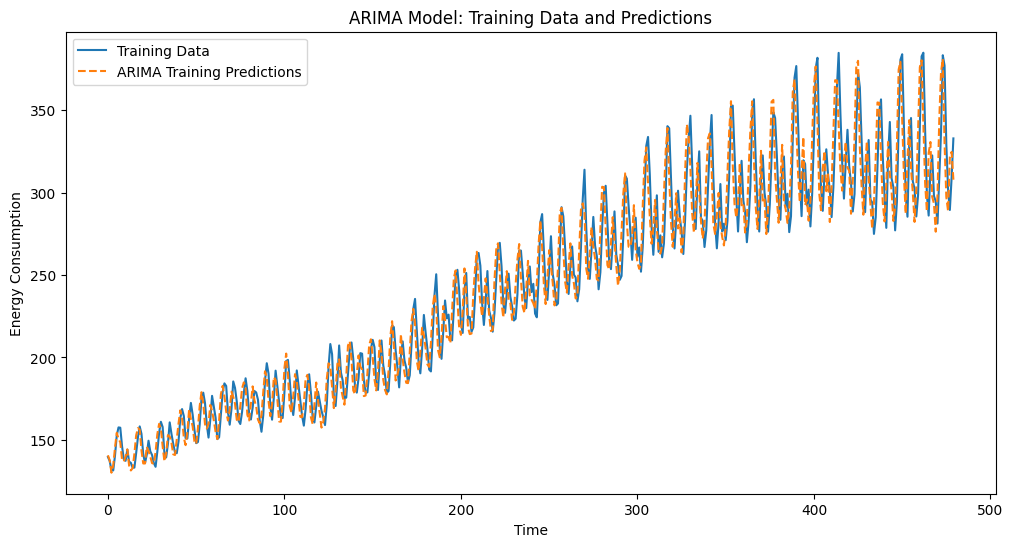

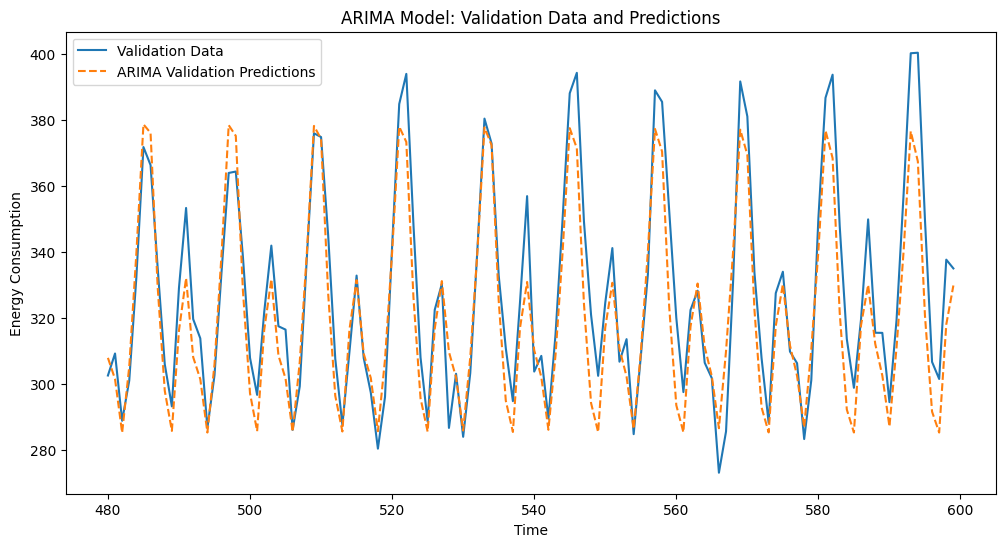

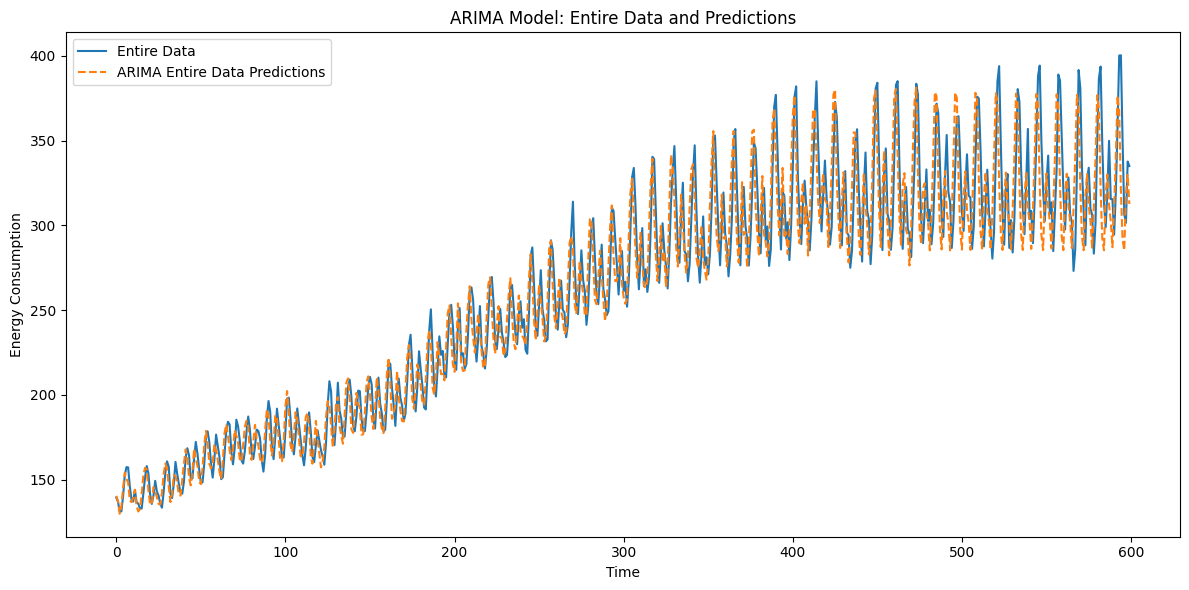

In [ ]:
# Plotting train data and train predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(train_data.index, predictions_train, label='ARIMA Training Predictions', linestyle='--')
plt.title('ARIMA Model: Training Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()

# Plotting test data and test predictions
plt.figure(figsize=(12, 6))
plt.plot(val_data.index, val_data, label='Validation Data')
plt.plot(val_data.index, predictions_val, label='ARIMA Validation Predictions', linestyle='--')
plt.title('ARIMA Model: Validation Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()

# Plotting entire data and entire predictions
plt.figure(figsize=(12, 6))
plt.plot(Data['Energy Consumption'], label='Entire Data')
plt.plot(Data['Energy Consumption'].index, predictions_entire, label='ARIMA Entire Data Predictions', linestyle='--')
plt.title('ARIMA Model: Entire Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()

Certainly! Let's define each of the terms you've mentioned:

1. **Heteroskedasticity:**
   - **Definition:** Heteroskedasticity refers to the situation where the variability of the errors (residuals) in a regression or time series model is not constant across all levels of the independent variable(s) or time periods.
   - **Significance:** Detecting heteroskedasticity is crucial because it violates one of the assumptions of ordinary least squares (OLS) regression and can affect the accuracy of statistical inferences.

2. **Ljung-Box (L1) and Jarque-Bera (JB):**
   - **Ljung-Box Test (Q):**
     - **Definition:** A statistical test that checks whether there is significant autocorrelation in a time series. It is often used to assess the adequacy of a time series model.
     - **Significance:** A low p-value (typically less than 0.05) suggests evidence against the null hypothesis of no autocorrelation, indicating that the model may need improvement.
   - **Jarque-Bera Test (JB):**
     - **Definition:** A statistical test that assesses whether the residuals of a regression or time series model have skewness and kurtosis similar to a normal distribution.
     - **Significance:** A high p-value (greater than 0.05) indicates that the residuals are approximately normally distributed. A low p-value suggests departure from normality.

3. **Skew and Kurtosis:**
   - **Skewness:**
     - **Definition:** Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. Positive skewness indicates a longer right tail, while negative skewness indicates a longer left tail.
   - **Kurtosis:**
     - **Definition:** Kurtosis measures the "tailedness" of the probability distribution of a real-valued random variable. High kurtosis indicates heavy tails, while low kurtosis indicates light tails.

4. **Coefficient Significance (P>|z|):**
   - **Definition:** In the context of regression or time series models, it refers to the significance of each coefficient. The p-value associated with each coefficient tests the null hypothesis that the coefficient is equal to zero.
   - **Significance:** A low p-value (typically less than 0.05) suggests that the corresponding variable is statistically significant in explaining the variation in the dependent variable.

5. **AIC, BIC, HQIC:**
   - **AIC (Akaike Information Criterion):** A measure of the relative quality of a statistical model. It penalizes models for complexity.
   - **BIC (Bayesian Information Criterion):** Similar to AIC but places a higher penalty on models with more parameters.
   - **HQIC (Hannan-Quinn Information Criterion):** Similar to AIC but with a different penalty term. It tends to favor simpler models.

6. **Coefficients:**
   - **Definition:** The coefficients in a regression or time series model represent the weights assigned to the respective independent variables or lagged values in predicting the dependent variable.

7. **Constant (const):**
   - **Definition:** The constant term, also known as the intercept, represents the baseline level or value of the dependent variable when all independent variables are zero.

8. **Log Likelihood:**
   - **Definition:** The log likelihood is a measure of how well the model explains the observed data. Higher values indicate a better fit.

These definitions provide a general understanding of the terms commonly used in the context of time series modeling and statistical analysis.

Let's interpret the results for the updated ARIMA(13, 0, 12) model:

1. **Coefficients:**
   - The coefficients for ar.L1 to ar.L13 and ma.L1 to ma.L12 represent the weights assigned to the respective lagged values. For example, ar.L1 is the coefficient for the first lag in the autoregressive (AR) part, and ma.L1 is the coefficient for the first lag in the moving average (MA) part.

2. **Constant (const):**
   - The constant term is 243.1124, indicating a baseline level for the time series.

3. **Log Likelihood:**
   - The Log Likelihood is -1529.101, indicating how well the model explains the observed data. Higher values are better.

4. **AIC, BIC, HQIC:**
   - AIC is 3112.202, BIC is 3224.894, and HQIC is 3156.499. Lower AIC, BIC, and HQIC values indicate a better model fit. Compare these values with the previous model to assess improvement.

5. **Ljung-Box Test (Q):**
   - The Ljung-Box test's p-value is 0.13, indicating that there might be some residual autocorrelation.

6. **Jarque-Bera Test (JB):**
   - The Jarque-Bera test's p-value is 0.00, suggesting that the residuals are not perfectly normal. This could be due to skewness or kurtosis.

7. **Heteroskedasticity (H):**
   - The test for heteroskedasticity has a p-value of 0.00, suggesting evidence against constant variance in residuals.

8. **Coefficient Significance (P>|z|):**
   - Check the p-values associated with each coefficient. Values less than 0.05 indicate that the corresponding variable is significant.

9. **Skew and Kurtosis:**
   - Skew is 0.10, indicating a slight right skewness, and kurtosis is 3.85, suggesting a distribution that is less heavy-tailed than a normal distribution.

10. **Ljung-Box (L1) and Jarque-Bera (JB):**
   - The Ljung-Box test for lag 1 (Q) is 2.31, and the Jarque-Bera test statistic is 15.04. These values help assess the model's adequacy. A low Q-value and a high JB p-value are desirable.

11. **Heteroskedasticity (H):**
   - The Heteroskedasticity test with a p-value of 0.00 suggests evidence against constant variance in residuals. Consider addressing heteroskedasticity.

In summary, the ARIMA(13, 0, 12) model has a good fit based on Log Likelihood, AIC, BIC, and HQIC values. However, pay attention to the Ljung-Box test, Jarque-Bera test, and Heteroskedasticity test for further diagnostics and potential model refinement. Well done on updating the model!

# Task 7
Calculate various performance indices, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), to evaluate and verify the model.

In [34]:
def calculate_metrics_and_print(original_data, predictions, model_order):
    # Mean Squared Error (MSE)
    mse = mean_squared_error(original_data, predictions)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (R2)
    r2 = r2_score(original_data, predictions)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(original_data, predictions)

    # Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) using the relative formula
    n = len(original_data)
    k = len(model_order)  # Number of parameters in the model
    aic = n * np.log(mse) + 2 * k
    bic = n * np.log(mse) + k * np.log(n)

    # Log Likelihood
    log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(mse)

    # Mean Absolute Percentage Error (MAPE)
    ape = np.abs((original_data - predictions) / original_data)
    mape = np.mean(ape) * 100

    # Print the metrics
    print("Metrics for Original Data Model:")
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R-squared: ", r2)
    print("MAE: ", mae)
    print("AIC: ", aic)
    print("BIC: ", bic)
    print("Log Likelihood: ", log_likelihood)
    print("MAPE: ", mape)

In [35]:
# Example usage
model_order = (p, d, q)  # Replace with the actual values of p, d, q
calculate_metrics_and_print(Data['Energy Consumption'], predictions_entire, model_order)

Metrics for Original Data Model:
MSE:  446.2246627800603
RMSE:  21.124030457752617
R-squared:  0.9058700291030639
MAE:  16.800568029156427
AIC:  3666.493532038808
BIC:  3679.6843210044567
Log Likelihood:  -2381.6098859422077
MAPE:  1.975543371981504


In [41]:
# Example usage
model_order = (p, d, q)  # Replace with the actual values of p, d, q
calculate_metrics_and_print(train_data, predictions_train, model_order)

Metrics for Original Data Model:
MSE:  294.9201102803784
RMSE:  17.173238200187477
R-squared:  0.9308684370578415
MAE:  14.030704360792747
AIC:  2735.618163386197
BIC:  2748.1395216979026
Log Likelihood:  -1805.8995776313413
MAPE:  1.7062465806609726


In [42]:
# Example usage
model_order = (p, d, q)  # Replace with the actual values of p, d, q
calculate_metrics_and_print(val_data, predictions_val, model_order)

Metrics for Original Data Model:
MSE:  161.66442461945863
RMSE:  12.714732581515769
R-squared:  0.8384112152342237
MAE:  10.135353865417182
AIC:  616.2627280607953
BIC:  624.6252032891415
Log Likelihood:  -415.4039880149584
MAPE:  3.0504863973359555


# Task 8
check the residuals of the ARIMA model. what insights can be drawn from the ACF and PACF plots, the Shapiro-Wilk and Anderson-Darling tests for normality, and the histogram analysis?

Analyzing the ACF and PACF of the residuals can provide valuable insights into the performance of your time series model. Here's how you can plot the ACF and PACF of the residuals and interpret the information:


**Interpretation:**

1. **ACF (Autocorrelation Function) of Residuals:**
   - ACF measures the correlation between the residuals at different lags.
   - If there are significant spikes at lags, it may indicate that there is still some information in the residuals that the model has not captured.

2. **PACF (Partial Autocorrelation Function) of Residuals:**
   - PACF provides the partial correlation between the residuals at different lags, removing the effects of intermediate lags.
   - Significant spikes at certain lags in the PACF may suggest that there is some remaining structure in the residuals that the model has not accounted for.

**What Information Can We Get:**

- **White Noise Residuals:**
  - Ideally, the residuals should resemble white noise, meaning they are uncorrelated and have constant variance.
  - In ACF and PACF, you would expect most spikes to be within the confidence intervals, indicating that the residuals are not exhibiting significant autocorrelation.

- **Serial Correlation:**
  - Significant spikes at certain lags in ACF and PACF may suggest that the model has not fully captured the temporal patterns in the data, and there might be room for improvement.

- **Model Assessment:**
  - Patterns in ACF or PACF may guide you in refining or choosing a different model order (p, d, q) to better capture the underlying structure in the time series.

- **Model Adequacy:**
  - If the ACF and PACF plots show no clear patterns or significant spikes, it suggests that the residuals are behaving like white noise, and the model is adequate.

Remember that while ACF and PACF are helpful diagnostic tools, they are not definitive proof of model performance. It's crucial to consider these plots along with other diagnostic tools and domain knowledge for a comprehensive assessment.

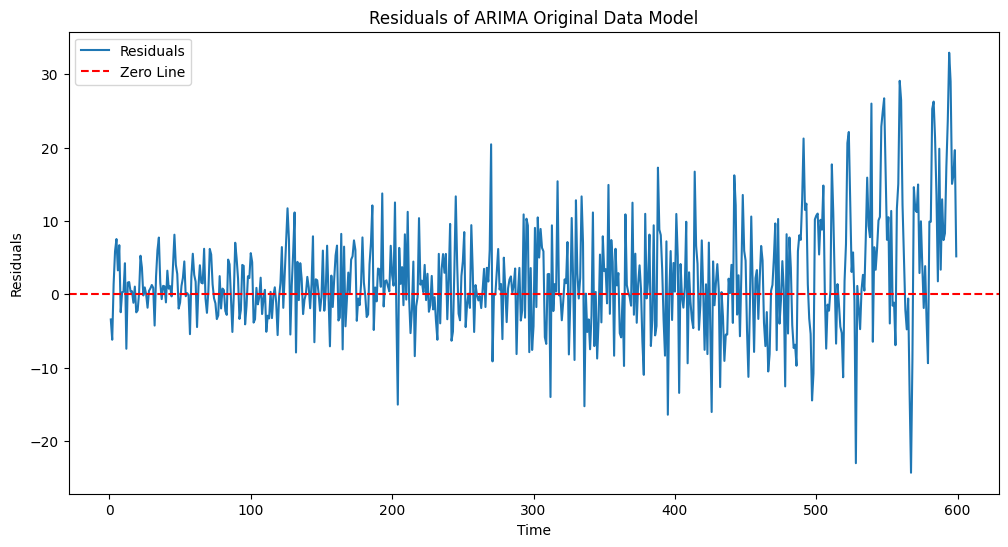

In [51]:
# Calculate residuals

residuals = Data['Energy Consumption'] - predictions_entire
# Drop NaN values from residuals
residuals = residuals.dropna()

# residuals = val_data - predictions_val

# residuals = residuals.dropna()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals of ARIMA Original Data Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()



The provided code calculates the residuals of an ARIMA model by subtracting the predicted values from the actual values of the 'Energy Consumption' time series data. Subsequently, any NaN values in the residuals are removed using the dropna() function, ensuring that the analysis is conducted on valid data points. The residuals are then visualized through a line plot, where deviations from zero are highlighted, indicating the differences between the actual and predicted values at each time point. This graphical representation allows for a qualitative assessment of the model's performance and provides insights into whether the residuals exhibit systematic patterns or randomness. The presence of a consistent pattern may suggest areas for model improvement, while a lack of discernible structure may indicate that the ARIMA model adequately captures the underlying patterns in the data.







Now we generate a white noise time series to better understand the analysing on the residual

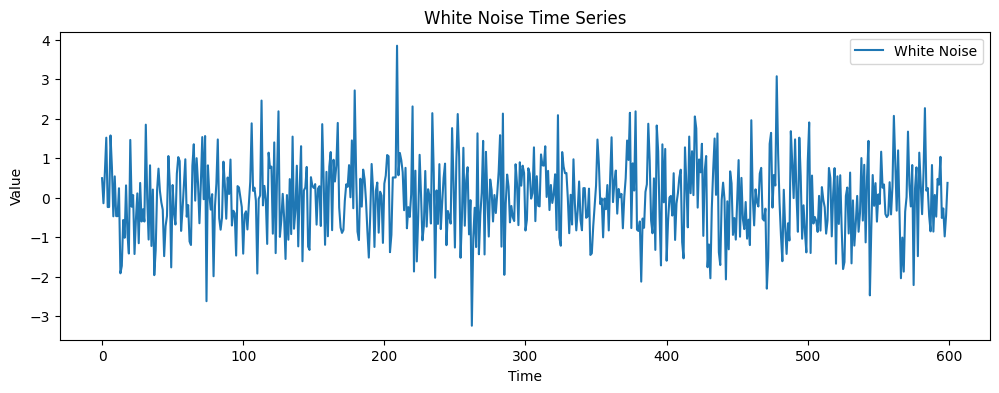

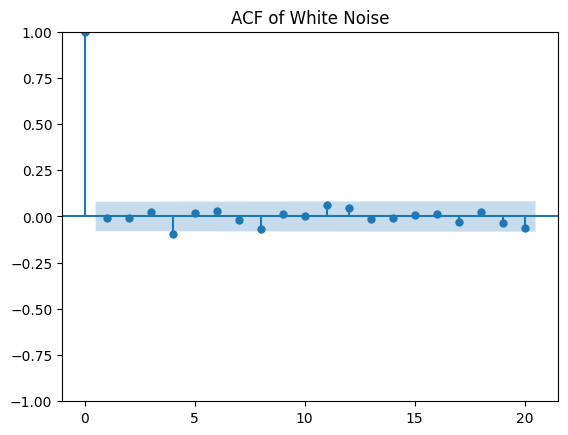

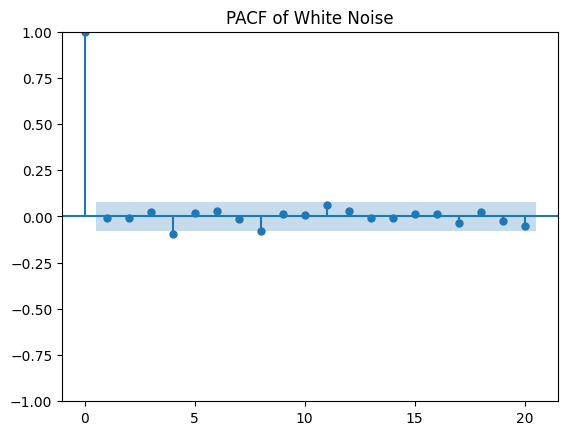

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set a seed for reproducibility
np.random.seed(42)

# Generate white noise with 100 data points
white_noise = np.random.normal(size=600)

# Plot the white noise time series
plt.figure(figsize=(12, 4))
plt.plot(white_noise, label='White Noise')
plt.title('White Noise Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot ACF and PACF for white noise
acf_white_noise = plot_acf(white_noise, lags=20, title='ACF of White Noise')
pacf_white_noise = plot_pacf(white_noise, lags=20, title='PACF of White Noise')


In this code snippet, a white noise time series is generated using the NumPy library with a seed set for reproducibility. The np.random.normal function creates a random sequence of normally distributed values, simulating a white noise process with 600 data points. The generated white noise time series is then visualized through a line plot, showcasing its characteristic randomness and lack of discernible patterns over time. Additionally, the ACF and PACF plots are generated to provide insights into the autocorrelation structure of the white noise. These plots are essential in assessing whether there are any significant correlations between the observations at different lags. Overall, this code serves as a foundational step in understanding and visualizing the properties of white noise, a fundamental concept in time series analysis.







Now, In this code snippet, the normality of the residuals from an ARIMA model is assessed using the Shapiro-Wilk and Anderson-Darling test. These test results, including the test statistic and p-value, are displayed.

Shapiro-Wilk Test (Normality):
Test Statistic: 0.9596146941184998
P-value: 9.250503141267075e-12
The residuals may not be normally distributed.
Anderson-Darling Test (Normality):
Test Statistic: 6.345883036873261
The data is likely not normal at the 15.0% significance level.
The data is likely not normal at the 10.0% significance level.
The data is likely not normal at the 5.0% significance level.
The data is likely not normal at the 2.5% significance level.
The data is likely not normal at the 1.0% significance level.


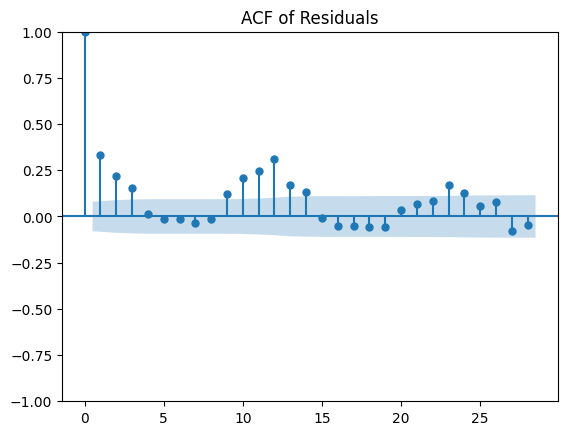

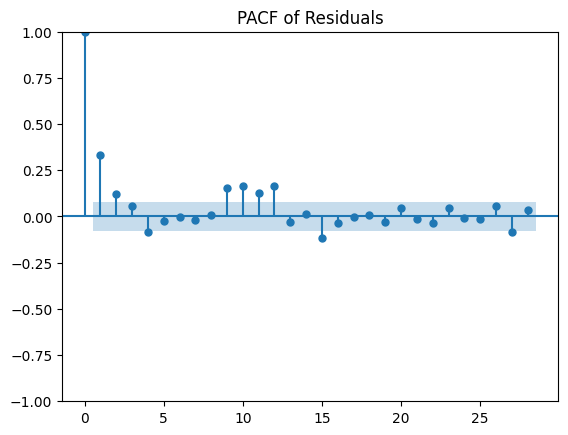

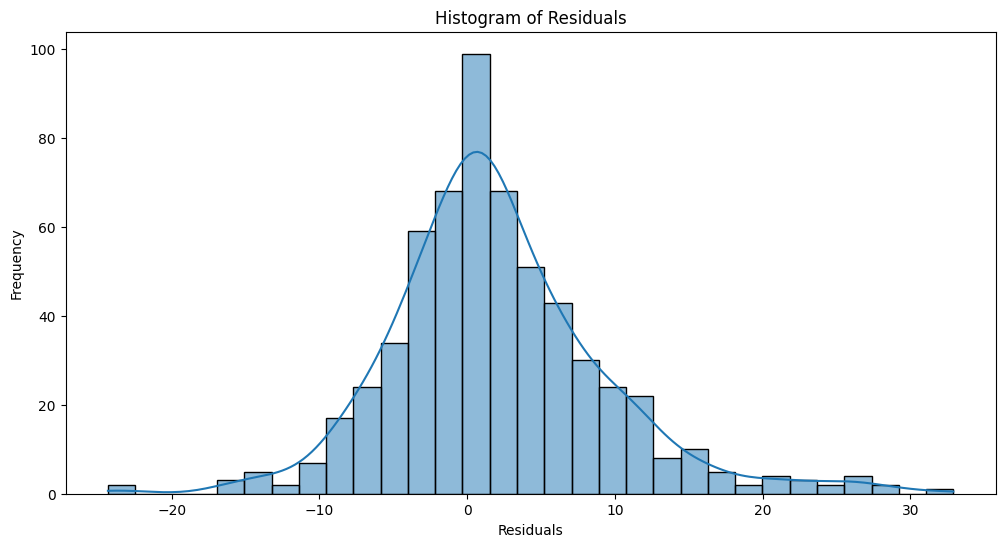

In [55]:
from scipy.stats import shapiro
import seaborn as sns
from scipy.stats import anderson

# Check for normality using the Shapiro-Wilk test
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk Test (Normality):")
print("Test Statistic:", stat)
print("P-value:", p_value)
if p_value > 0.05:
    print("The residuals appear to be normally distributed.")
else:
    print("The residuals may not be normally distributed.")

# Perform the Anderson-Darling test for normality
result = anderson(residuals)

# Extract the test statistic and critical values
test_statistic = result.statistic
critical_values = result.critical_values

# Compare the test statistic with critical values
print("Anderson-Darling Test (Normality):")
print("Test Statistic:", test_statistic)

# Interpret the results based on critical values
for i, cv in enumerate(critical_values):
    if test_statistic < cv:
        print(f"The data may be normal at the {result.significance_level[i]}% significance level.")
    else:
        print(f"The data is likely not normal at the {result.significance_level[i]}% significance level.")


# Plot ACF and PACF on residuals
acf_res = plot_acf(residuals,  title='ACF of Residuals')
pacf_res = plot_pacf(residuals,  title='PACF of Residuals')

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


The normality tests, Shapiro-Wilk and Anderson-Darling, are conducted to assess whether the residuals of the ARIMA model follow a normal distribution.

1. **Shapiro-Wilk Test:**
   - Test Statistic: 0.9596
   - P-value: 9.25e-12

   **Interpretation:**
   - The null hypothesis for the Shapiro-Wilk test is that the data follows a normal distribution. With a p-value significantly less than 0.05, we reject the null hypothesis. Therefore, based on the Shapiro-Wilk test, the residuals may not be normally distributed.

2. **Anderson-Darling Test:**
   - Test Statistic: 6.3459

   **Interpretation:**
   - The Anderson-Darling test provides critical values for different significance levels (15.0%, 10.0%, 5.0%, 2.5%, and 1.0%). The test statistic is compared against these critical values.
   - At the 15.0% significance level, the data is likely not normal.
   - At the 10.0% significance level, the data is likely not normal.
   - At the 5.0% significance level, the data is likely not normal.
   - At the 2.5% significance level, the data is likely not normal.
   - At the 1.0% significance level, the data is likely not normal.

**Overall Interpretation:**
- Both the Shapiro-Wilk and Anderson-Darling tests suggest that the residuals may not follow a normal distribution. The p-value from the Shapiro-Wilk test is extremely low, and the Anderson-Darling critical values at various significance levels consistently indicate the likely non-normality of the data.


**Histogram of Residuals:**
- The histogram of residuals, along with the kernel density estimate, visually represents the distribution of residuals. In this case, the shape of the histogram provides additional evidence that the residuals may deviate from a normal distribution.

**Recommendation:**
- Given the results of the normality tests, it's essential to consider the potential impact on the reliability of statistical inferences. If normality is a critical assumption for your analysis, you may explore transformations or alternative modeling approaches to address the observed non-normality in the residuals. Additionally, consider whether the sample size is sufficient for drawing conclusions from the normality tests.

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are crucial tools for identifying potential autocorrelation in time series data. In your case, specific lag values in both ACF and PACF plots are outside the bounds, indicating potential autocorrelation.

**ACF Outliers (Outside Bounds):**
- Lag values 2, 3, 4, 9, 10, 11, 12, 13, 14, 23, 24 are outside the bounds.

**PACF Outliers (Outside Bounds):**
- Lag values 2, 3, 9, 10, 11, 12, 15, 27 are outside the bounds.

**Interpretation:**
- In the ACF plot, lag values outside the blue shaded region indicate significant autocorrelation at those lags. Similarly, in the PACF plot, values outside the blue shaded region suggest significant partial autocorrelation.

**Recommendation:**
- The identified outliers in the ACF and PACF plots indicate potential autocorrelation in the residuals. This may imply that the ARIMA model could be further refined to better capture the temporal dependencies in the data.
- Consider adjusting the model parameters or exploring more complex models to address the observed autocorrelation patterns. Additionally, reviewing the original time series data for any patterns or features that the current model may not be capturing could be beneficial.
- It's also essential to ensure that the identified autocorrelation is not a result of overfitting or model complexity. Strike a balance between model complexity and its ability to generalize to new data.

Keep iterating on the model, adjusting parameters, and checking diagnostic plots until the autocorrelation patterns are minimized.